In [1]:
#the structure and size of the dataset

import pandas as pd

# Define the dataset path
dataset_path = r'C:\Users\31615\.data\pykeen\datasets\fb15k237\Release'

# Load training, validation, and test data with full paths
train_data = pd.read_csv(f'{dataset_path}\\train.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])
valid_data = pd.read_csv(f'{dataset_path}\\valid.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])
test_data = pd.read_csv(f'{dataset_path}\\test.txt', sep='\t', header=None, names=['head', 'relation', 'tail'])

# Dataset statistics
print(f"Number of training triples: {len(train_data)}")
print(f"Number of validation triples: {len(valid_data)}")
print(f"Number of test triples: {len(test_data)}")

# Preview the data
print("Sample Training Data:")
print(train_data.head())


Number of training triples: 272115
Number of validation triples: 17535
Number of test triples: 20466
Sample Training Data:
         head                                           relation       tail
0    /m/027rn               /location/country/form_of_government   /m/06cx9
1   /m/017dcd  /tv/tv_program/regular_cast./tv/regular_tv_app...  /m/06v8s0
2  /m/07s9rl0                 /media_common/netflix_genre/titles  /m/0170z3
3   /m/01sl1q  /award/award_winner/awards_won./award/award_ho...  /m/044mz_
4   /m/0cnk2q  /soccer/football_team/current_roster./sports/s...  /m/02nzb8


Central entities: Definition: These are the entities with the highest degree, meaning they appear most frequently in the dataset (either as a head or a tail). example: Entity A appears in 3 triples.


In [2]:
import pandas as pd

# Relation Patterns
relation_patterns = train_data.groupby('relation').apply(
    lambda x: {
        'unique_heads': x['head'].nunique(),
        'unique_tails': x['tail'].nunique()
    }
)

# Central Entities
entity_degrees = pd.concat([train_data['head'], train_data['tail']]).value_counts()
central_entities = entity_degrees.nlargest(10)

print("Relation Patterns:", relation_patterns)
print("Central Entities:", central_entities)


Relation Patterns: relation
/american_football/football_team/current_roster./sports/sports_team_roster/position              {'unique_heads': 65, 'unique_tails': 16}
/award/award_category/category_of                                                               {'unique_heads': 148, 'unique_tails': 20}
/award/award_category/disciplines_or_subjects                                                   {'unique_heads': 105, 'unique_tails': 34}
/award/award_category/nominees./award/award_nomination/nominated_for                          {'unique_heads': 239, 'unique_tails': 1587}
/award/award_category/winners./award/award_honor/award_winner                                 {'unique_heads': 432, 'unique_tails': 2445}
                                                                                                                 ...                     
/tv/tv_writer/tv_programs./tv/tv_program_writer_relationship/tv_program                         {'unique_heads': 188, 'unique_tails': 86}
/user/

C:\Users\31615\AppData\Local\Temp\ipykernel_5900\426514780.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  relation_patterns = train_data.groupby('relation').apply(


In [3]:
# Reinitialize dataset since environment reset
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx


# **1. Entity-Relation Distribution**
unique_heads = train_data['head'].nunique()
unique_tails = train_data['tail'].nunique()
unique_relations = train_data['relation'].nunique()

entity_relation_distribution = {
    "Unique Heads": unique_heads,
    "Unique Tails": unique_tails,
    "Unique Relations": unique_relations
}
print("Entity-Relation Distribution:")
print(entity_relation_distribution)

Entity-Relation Distribution:
{'Unique Heads': 13781, 'Unique Tails': 13379, 'Unique Relations': 237}


In [4]:
# **2. Entity Degree Distribution**
entity_degrees = pd.concat([train_data['head'], train_data['tail']]).value_counts()
print("\nTop 10 Entity Degrees:")
print(entity_degrees.head(10))


Top 10 Entity Degrees:
/m/09c7w0     7614
/m/09nqf      4286
/m/08mbj5d    3612
/m/04ztj      2992
/m/05zppz     2928
/m/02h40lc    2675
/m/02hrh1q    2272
/m/07ssc      1953
/m/02sdk9v    1787
/m/02nzb8     1776
Name: count, dtype: int64


In [5]:
# **3. Relation Frequency**
relation_frequency = train_data['relation'].value_counts()
print("\nTop 10 Relation Frequencies:")
print(relation_frequency.head(110)) # 237 is total number of relations


Top 10 Relation Frequencies:
relation
/award/award_nominee/award_nominations./award/award_nomination/award_nominee                 15989
/film/film/release_date_s./film/film_regional_release_date/film_release_region               12893
/award/award_nominee/award_nominations./award/award_nomination/award                         12157
/people/person/profession                                                                    10945
/film/actor/film./film/performance/film                                                       9494
                                                                                             ...  
/organization/endowed_organization/endowment./measurement_unit/dated_money_value/currency      456
/base/popstra/celebrity/canoodled./base/popstra/canoodled/participant                          449
/sports/professional_sports_team/draft_picks./sports/sports_league_draft_pick/draft            437
/people/person/spouse_s./people/marriage/spouse                       

In [6]:
# **4. Head-Tail Distribution for Each Relation**
relation_patterns = train_data.groupby('relation').apply(
    lambda x: {
        'unique_heads': x['head'].nunique(),
        'unique_tails': x['tail'].nunique()
    }
)
print("\nHead-Tail Distribution for Each Relation:")
print(relation_patterns)


Head-Tail Distribution for Each Relation:
relation
/american_football/football_team/current_roster./sports/sports_team_roster/position              {'unique_heads': 65, 'unique_tails': 16}
/award/award_category/category_of                                                               {'unique_heads': 148, 'unique_tails': 20}
/award/award_category/disciplines_or_subjects                                                   {'unique_heads': 105, 'unique_tails': 34}
/award/award_category/nominees./award/award_nomination/nominated_for                          {'unique_heads': 239, 'unique_tails': 1587}
/award/award_category/winners./award/award_honor/award_winner                                 {'unique_heads': 432, 'unique_tails': 2445}
                                                                                                                 ...                     
/tv/tv_writer/tv_programs./tv/tv_program_writer_relationship/tv_program                         {'unique_heads': 188, 'u

C:\Users\31615\AppData\Local\Temp\ipykernel_5900\3525490055.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  relation_patterns = train_data.groupby('relation').apply(


In [7]:
# **5. Relation Types (Symmetric, Asymmetric, Reflexive)**
# Symmetric: Check if reverse pairs exist
symmetric_relations = train_data.merge(
    train_data.rename(columns={'head': 'tail', 'tail': 'head'}),
    on=['head', 'relation', 'tail'],
    how='inner'
)['relation'].unique()

reflexive_relations = train_data[train_data['head'] == train_data['tail']]['relation'].unique()

# Classify each relation
relation_types = {
    relation: 'symmetric' if relation in symmetric_relations
    else 'reflexive' if relation in reflexive_relations
    else 'asymmetric'
    for relation in train_data['relation'].unique()
}

# Count the number of each relation type
relation_type_counts = {
    "symmetric": sum(1 for r in relation_types.values() if r == 'symmetric'),
    "reflexive": sum(1 for r in relation_types.values() if r == 'reflexive'),
    "asymmetric": sum(1 for r in relation_types.values() if r == 'asymmetric')
}

# Create a summary table
relation_type_summary = pd.DataFrame({
    'Relation Type': relation_type_counts.keys(),
    'Count': relation_type_counts.values()
})

# Display the summary table
print("Summary of Relation Types:")
print(relation_type_summary)

# Optional: Save the summary as a CSV file
relation_type_summary.to_csv("relation_type_summary.csv", index=False)
print("Relation type summary saved as 'relation_type_summary.csv'")


Summary of Relation Types:
  Relation Type  Count
0     symmetric     44
1     reflexive      0
2    asymmetric    193
Relation type summary saved as 'relation_type_summary.csv'


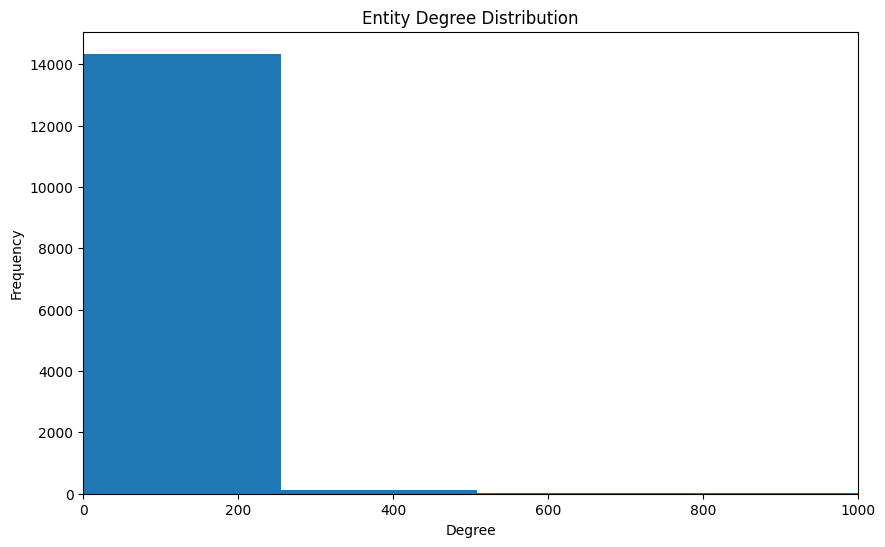

In [8]:
# **6. Degree Distribution Visualization**
plt.figure(figsize=(10, 6))
entity_degrees.plot(kind='hist', bins=30, title="Entity Degree Distribution")
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.xlim(0, 1000) 
plt.show()

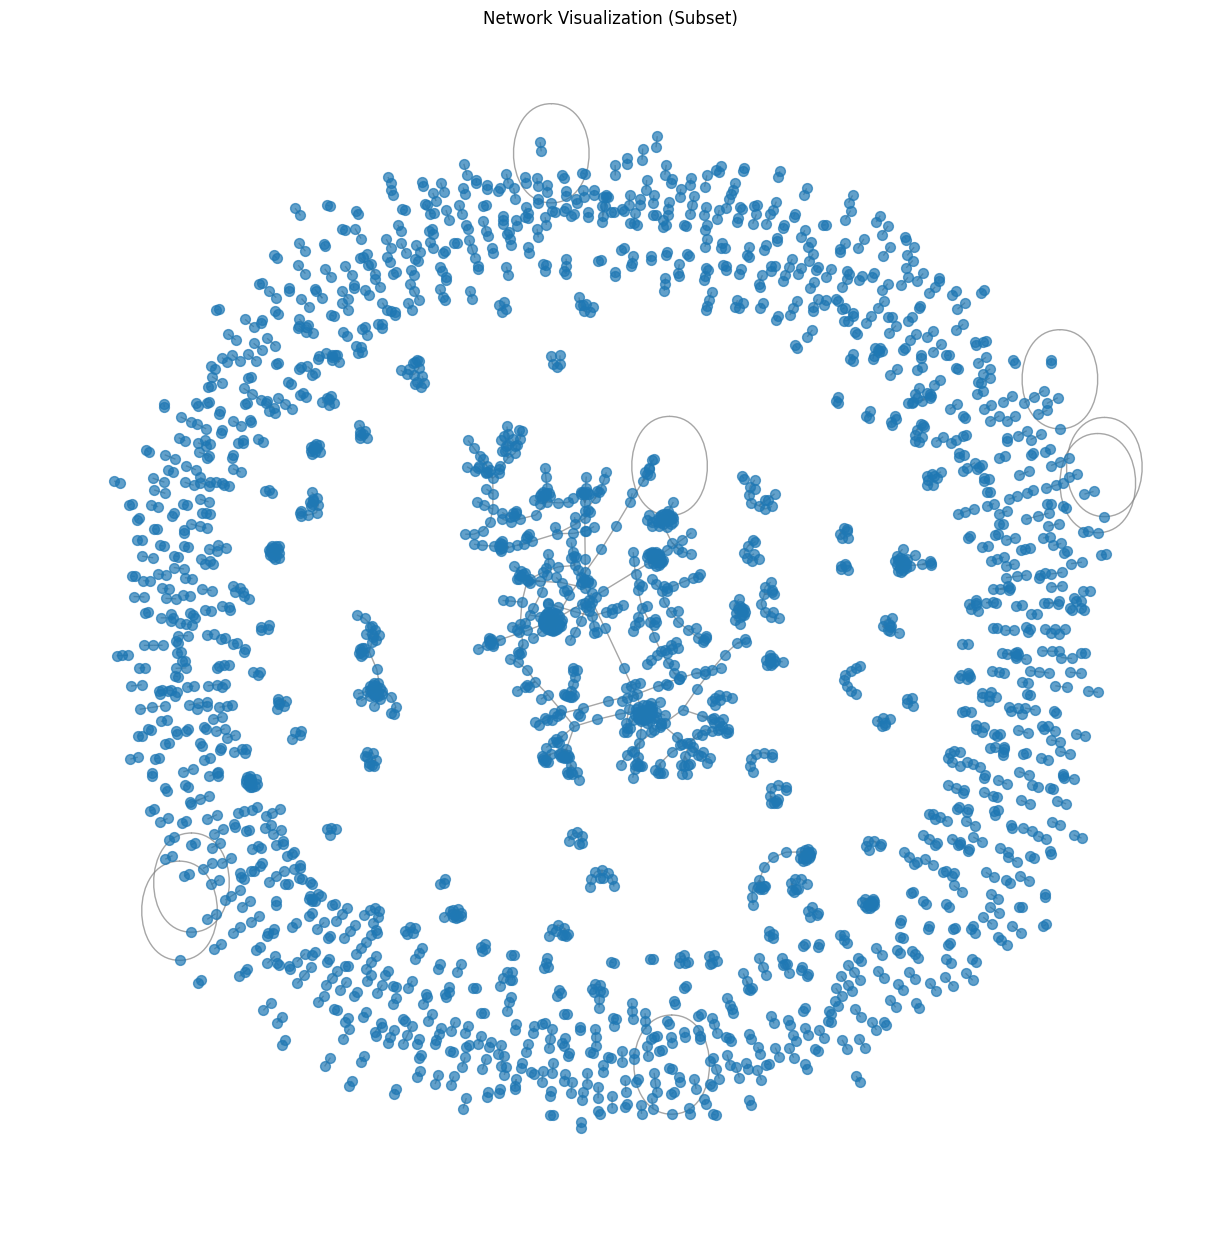

In [9]:
# **7. Network Visualization**
# Sample a subset of the data for visualization
subset_graph = nx.from_pandas_edgelist(
    train_data.sample(2000), source='head', target='tail', edge_attr='relation'
)
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(subset_graph, seed=42)
nx.draw(
    subset_graph,
    pos,
    with_labels=False,
    node_size=50,
    edge_color='gray',
    alpha=0.7
)
plt.title("Network Visualization (Subset)")
plt.show()